In [25]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [26]:
df1 = pd.read_csv('AWS19_train_64_RIPE.csv', header=None)
df2 = pd.read_csv('AWS19_test_64_RIPE.csv', header=None)
df1 = df1.append([df2])
df1

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,0.0,0.0,2070.0,132.0,2805.0,292.0,5.0,18.0,...,0.0,0.0,0.0,0.0,0.0,4913.0,1.0,660.0,366.0,0.0
1,1.0,0.0,1.0,0.0,1426.0,149.0,2237.0,307.0,5.0,18.0,...,0.0,0.0,0.0,0.0,0.0,2979.0,0.0,441.0,357.0,0.0
2,2.0,0.0,2.0,0.0,1241.0,133.0,2250.0,311.0,5.0,19.0,...,0.0,0.0,0.0,0.0,0.0,3609.0,0.0,443.0,372.0,0.0
3,3.0,0.0,3.0,0.0,1252.0,107.0,2451.0,322.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,3474.0,0.0,410.0,373.0,0.0
4,4.0,0.0,4.0,0.0,1414.0,139.0,2416.0,241.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,3982.0,0.0,539.0,373.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,2355.0,23.0,55.0,0.0,2500.0,90.0,14031.0,192.0,5.0,22.0,...,0.0,0.0,0.0,0.0,0.0,4558.0,3.0,788.0,409.0,0.0
4346,2356.0,23.0,56.0,0.0,1397.0,129.0,3703.0,219.0,5.0,24.0,...,0.0,0.0,0.0,0.0,0.0,4290.0,8.0,506.0,385.0,0.0
4347,2357.0,23.0,57.0,0.0,1187.0,85.0,2145.0,138.0,5.0,27.0,...,0.0,0.0,0.0,0.0,0.0,2876.0,4.0,378.0,363.0,0.0
4348,2358.0,23.0,58.0,0.0,1589.0,79.0,2623.0,125.0,5.0,73.0,...,0.0,0.0,0.0,0.0,0.0,4121.0,0.0,544.0,368.0,0.0


In [3]:
# df = df1.drop(df1.columns[[0]], axis=1)
# df

In [3]:
#df = df1.astype(int)
df1.to_csv('AWS2019_recent.csv')

In [27]:
features = df1.loc[:, 4:40]

In [28]:
df1.iloc[:, 41].value_counts()

0.0    6390
1.0    3690
Name: 41, dtype: int64

In [29]:
X = features
#X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

In [30]:
def targetify(s):
    if s == 0.0:
        return 0
    else:
        return 1

In [31]:
df1['Target']=df1.loc[:,41].apply(targetify)

In [32]:
 y = df1['Target']

In [33]:
df1["Target"].value_counts()

0    6390
1    3690
Name: Target, dtype: int64

In [34]:
X = X.fillna(0)

In [35]:
X = X.apply(pd.to_numeric, errors='coerce')

In [36]:
X = X.fillna(0)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(6048, 37) (6048,)
(4032, 37) (4032,)


In [50]:
y_train.value_counts()

0    3823
1    2225
Name: Target, dtype: int64

In [51]:
y_test.value_counts()

0    2567
1    1465
Name: Target, dtype: int64

In [40]:
X_train.head()

,4,5,6,7,8,9,10,11,12,13,...,31,32,33,34,35,36,37,38,39,40
2869,1359.0,115.0,2496.0,360.0,5.0,16.0,6.0,2612.0,23183.0,856.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3875.0,0.0,512.0,378.0
3238,1117.0,93.0,1613.0,141.0,5.0,18.0,6.0,2005.0,17741.0,424.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2847.0,1.0,402.0,364.0
1109,1430.0,113.0,2566.0,206.0,5.0,18.0,5.0,4615.0,40036.0,337.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3780.0,3.0,514.0,372.0
455,1652.0,124.0,4595.0,196.0,5.0,18.0,6.0,9587.0,58927.0,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3906.0,0.0,477.0,378.0
4187,1499.0,133.0,3060.0,249.0,5.0,19.0,6.0,2368.0,25253.0,527.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4439.0,2.0,590.0,374.0


In [41]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [42]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [43]:
importances = forest.feature_importances_

In [44]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [45]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 34: 38 (0.203405)
2. feature 35: 39 (0.079968)
3. feature 33: 37 (0.069592)
4. feature 3: 7 (0.066055)
5. feature 1: 5 (0.064385)
6. feature 0: 4 (0.064168)
7. feature 36: 40 (0.060320)
8. feature 7: 11 (0.060017)
9. feature 9: 13 (0.059960)
10. feature 2: 6 (0.059644)
11. feature 8: 12 (0.059315)
12. feature 11: 15 (0.058969)
13. feature 6: 10 (0.018158)
14. feature 10: 14 (0.015880)
15. feature 5: 9 (0.015715)
16. feature 12: 16 (0.014487)
17. feature 4: 8 (0.006211)
18. feature 22: 26 (0.005602)
19. feature 20: 24 (0.005546)
20. feature 21: 25 (0.005008)
21. feature 19: 23 (0.004067)
22. feature 18: 22 (0.001096)
23. feature 32: 36 (0.001031)
24. feature 31: 35 (0.000587)
25. feature 17: 21 (0.000570)
26. feature 30: 34 (0.000127)
27. feature 16: 20 (0.000116)
28. feature 29: 33 (0.000000)
29. feature 13: 17 (0.000000)
30. feature 28: 32 (0.000000)
31. feature 15: 19 (0.000000)
32. feature 23: 27 (0.000000)
33. feature 24: 28 (0.000000)
34. feature 25: 29

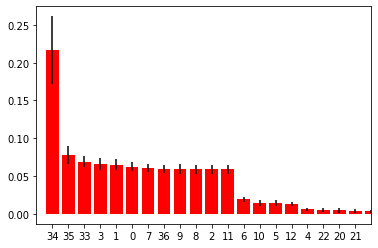

In [23]:
# Plot the top x feature importances of the forest
top_x = 20

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

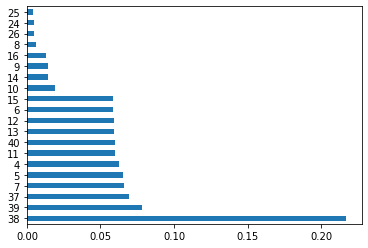

In [24]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")